Columns before cleaning: Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer_ID       9648 non-null   object        
 2   Invoice_Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price_per_Unit    9648 non-null   float64       
 8   Units_Sold        9648 non-null   int64         
 9   Total_Sales       9648 no

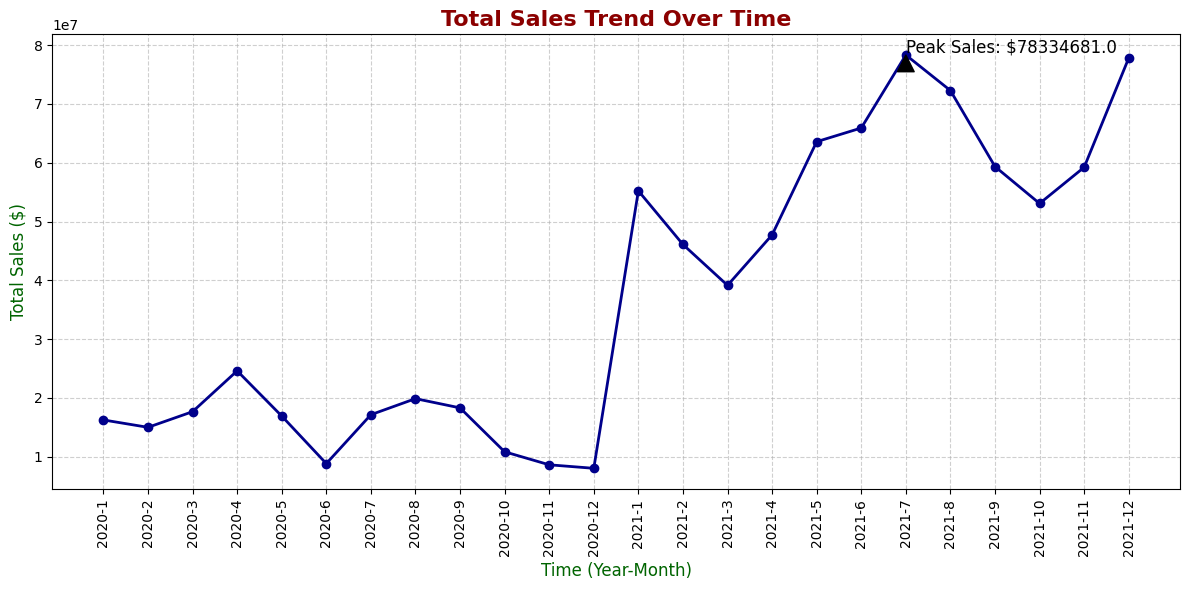

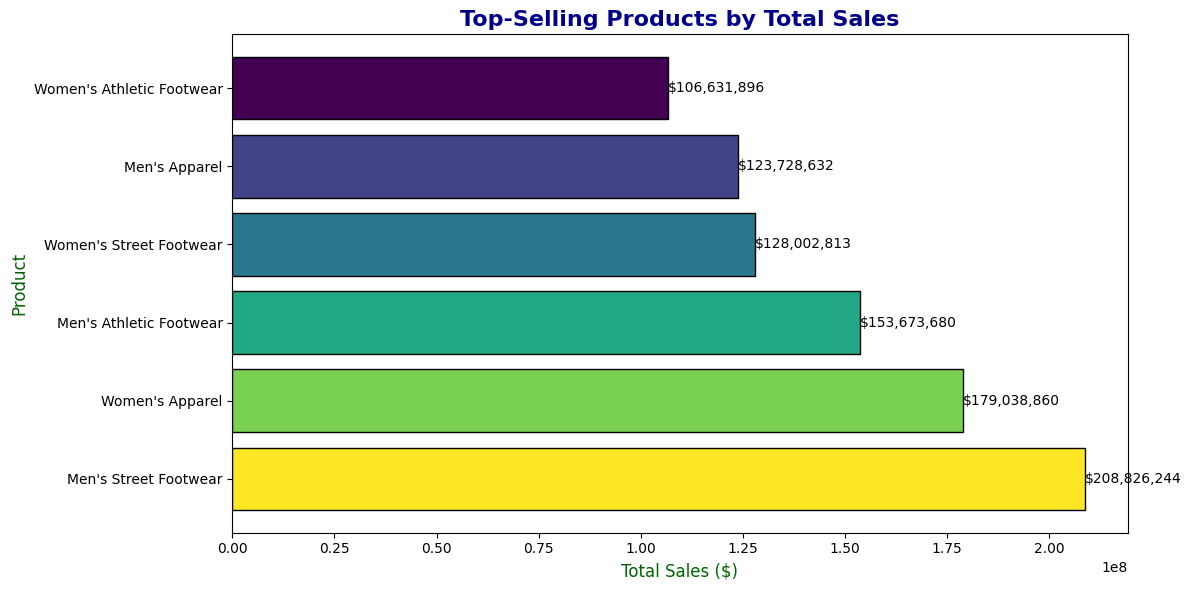

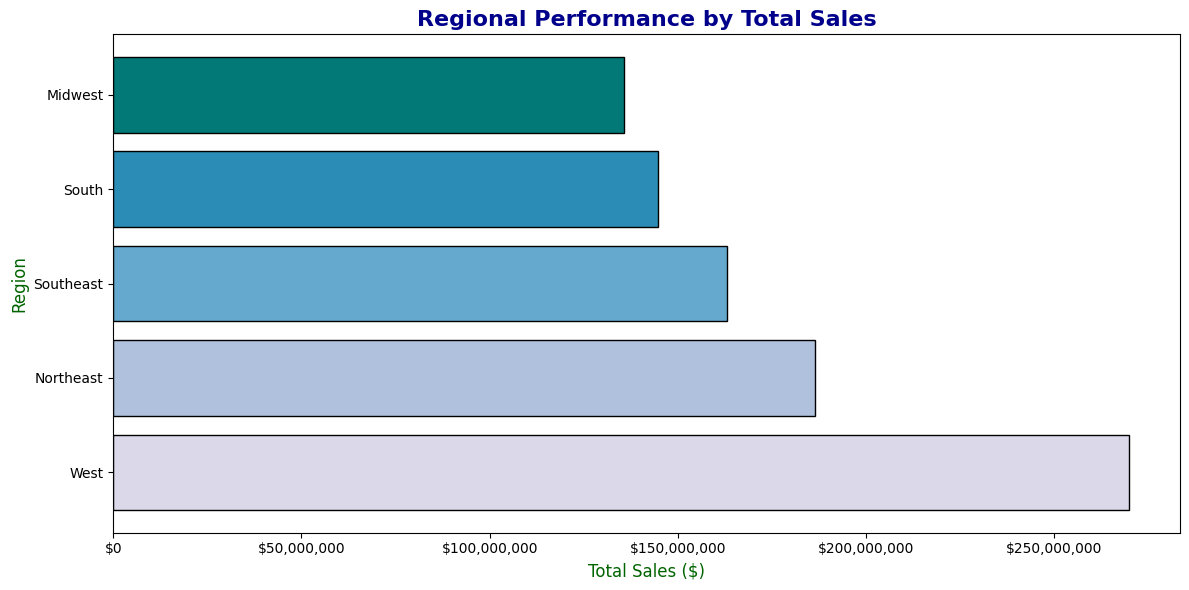

<bound method Axes.set of <Axes: xlabel='Region', ylabel='Operating Profit ($)'>>

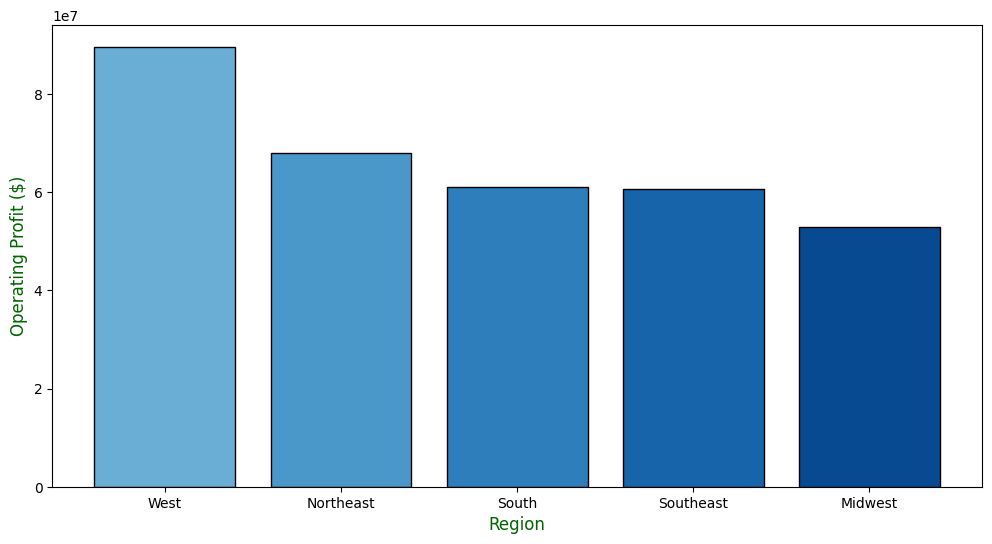

In [4]:
# ============================================
# TITLE: Adidas US Sales Data Analysis
# GOAL: Analyze Adidas sales performance across regions, products, and other key metrics
# OBJECTIVE: Explore data trends, identify top-performing products and regions, and analyze profit margins
# ============================================

# Setup: Importing necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Explanation:
# - pandas: for data manipulation and analysis
# - matplotlib: for creating static visualizations
# - numpy: for numerical operations, including generating color gradients for the plots

# Load the dataset
file_path = 'Adidas US Sales Datasets.xlsx'  # Replace with your file path
df_adidas_sales = pd.read_excel(file_path, sheet_name='Data Sales Adidas')

# ============================================
# DATA CLEANING PROCESS
# ============================================

# GOAL: Clean the dataset to make it usable for analysis by removing unnecessary rows and formatting the columns properly

# Step 1: Inspect the columns to check for any extra or unnecessary columns
print("Columns before cleaning:", df_adidas_sales.columns)

# Step 2: Data Cleaning: Remove unnecessary rows and clean up the headers
df_adidas_cleaned = df_adidas_sales.iloc[4:, :].copy()  # Skip the first 4 rows that don't contain actual data

# Step 3: If there's an extra column (e.g., 'Unnamed: 0'), drop it
df_adidas_cleaned = df_adidas_cleaned.drop(columns=['Unnamed: 0'])  # Drop irrelevant column

# Step 4: Rename the columns for easier reference
df_adidas_cleaned.columns = ['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City', 
                             'Product', 'Price_per_Unit', 'Units_Sold', 'Total_Sales', 
                             'Operating_Profit', 'Operating_Margin', 'Sales_Method']

# Step 5: Reset the index to ensure proper formatting
df_adidas_cleaned = df_adidas_cleaned.reset_index(drop=True)

# Step 6: Convert necessary columns to numeric types for proper calculations
df_adidas_cleaned['Price_per_Unit'] = pd.to_numeric(df_adidas_cleaned['Price_per_Unit'], errors='coerce')
df_adidas_cleaned['Units_Sold'] = pd.to_numeric(df_adidas_cleaned['Units_Sold'], errors='coerce')
df_adidas_cleaned['Total_Sales'] = pd.to_numeric(df_adidas_cleaned['Total_Sales'], errors='coerce')
df_adidas_cleaned['Operating_Profit'] = pd.to_numeric(df_adidas_cleaned['Operating_Profit'], errors='coerce')
df_adidas_cleaned['Operating_Margin'] = pd.to_numeric(df_adidas_cleaned['Operating_Margin'], errors='coerce')

# Step 7: Convert the Invoice_Date column to datetime to analyze trends over time
df_adidas_cleaned['Invoice_Date'] = pd.to_datetime(df_adidas_cleaned['Invoice_Date'], errors='coerce')

# Check the structure of the cleaned dataset (optional step to confirm cleaning)
df_adidas_cleaned.info()

# ============================================
# DATA EXPLORATION PROCESS
# ============================================

# GOAL: Perform an in-depth exploration of Adidas sales data, identifying trends over time, top-selling products, regional performance, and profit analysis

# ========================== Sales Trends Over Time =============================

# GOAL: Analyze how sales have evolved over time to identify key trends and patterns

# Step 1: Create new columns for Year and Month to allow grouping of data by time
df_adidas_cleaned['Year'] = df_adidas_cleaned['Invoice_Date'].dt.year
df_adidas_cleaned['Month'] = df_adidas_cleaned['Invoice_Date'].dt.month

# Step 2: Group the data by Year and Month to calculate total sales for each time period
sales_trend = df_adidas_cleaned.groupby(['Year', 'Month']).agg({'Total_Sales': 'sum'}).reset_index()

# Step 3: Plot sales trend over time with customizations for better visualization
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Year'].astype(str) + '-' + sales_trend['Month'].astype(str), 
         sales_trend['Total_Sales'], 
         marker='o', 
         linestyle='-', 
         color='darkblue', 
         linewidth=2, 
         markersize=6)

plt.title('Total Sales Trend Over Time', fontsize=16, fontweight='bold', color='darkred')
plt.xlabel('Time (Year-Month)', fontsize=12, color='darkgreen')
plt.ylabel('Total Sales ($)', fontsize=12, color='darkgreen')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight peak sales with annotation
max_sales = sales_trend['Total_Sales'].max()
max_sales_date = sales_trend[sales_trend['Total_Sales'] == max_sales]['Year'].astype(str).values[0] + '-' + sales_trend[sales_trend['Total_Sales'] == max_sales]['Month'].astype(str).values[0]
plt.annotate(f'Peak Sales: ${max_sales}', xy=(max_sales_date, max_sales), xytext=(max_sales_date, max_sales+500000), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')

plt.tight_layout()
plt.show()

# ========================== Product Performance =============================
# GOAL: Identify the top-selling products and visualize their performance

# Step 1: Group the data by Product to calculate total units sold and total sales for each product category
product_performance = df_adidas_cleaned.groupby('Product').agg({'Units_Sold': 'sum', 'Total_Sales': 'sum'}).reset_index()

# Step 2: Sort the products by total sales to identify the top performers
top_selling_products = product_performance.sort_values(by='Total_Sales', ascending=False)

# Step 3: Plot the top-selling products with a gradient color scheme and labeled bars
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis_r(np.linspace(0, 1, len(top_selling_products)))
plt.barh(top_selling_products['Product'], top_selling_products['Total_Sales'], color=colors, edgecolor='black')

plt.title('Top-Selling Products by Total Sales', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Total Sales ($)', fontsize=12, color='darkgreen')
plt.ylabel('Product', fontsize=12, color='darkgreen')

# Add labels to each bar for clarity
for index, value in enumerate(top_selling_products['Total_Sales']):
    plt.text(value, index, f'${int(value):,}', va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

# ========================== Regional Sales Performance ======================
# GOAL: Analyze the performance of different regions to identify top-performing areas

# Step 1: Group the data by Region to calculate total sales and units sold
regional_performance = df_adidas_cleaned.groupby('Region').agg({'Units_Sold': 'sum', 'Total_Sales': 'sum'}).reset_index()

# Step 2: Sort by total sales to identify the top-performing regions
top_regions = regional_performance.sort_values(by='Total_Sales', ascending=False)

# Step 3: Plot the regional performance with a gradient color scheme and formatted axes
plt.figure(figsize=(12, 6))
colors = plt.cm.PuBuGn(np.linspace(0.2, 0.8, len(top_regions)))
plt.barh(top_regions['Region'], top_regions['Total_Sales'], color=colors, edgecolor='black')

plt.title('Regional Performance by Total Sales', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Total Sales ($)', fontsize=12, color='darkgreen')
plt.ylabel('Region', fontsize=12, color='darkgreen')

# Format y-axis to show commas for large numbers
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"${int(x):,}"))

plt.tight_layout()
plt.show()

# ========================== Operating Profit Analysis =======================
# GOAL: Compare the operating profit and margin for different regions to identify the most profitable areas

# Step 1: Group the data by Region to calculate total operating profit and the average operating margin
profit_performance = df_adidas_cleaned.groupby('Region').agg({'Operating_Profit': 'sum', 'Operating_Margin': 'mean'}).reset_index()

# Step 2: Sort the regions by total operating profit
top_profit_regions = profit_performance.sort_values(by='Operating_Profit', ascending=False)

# Step 3: Create a dual-axis plot to show both operating profit and margin
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for operating profit
colors = plt.cm.Blues(np.linspace(0.5, 0.9, len(top_profit_regions)))
ax1.bar(top_profit_regions['Region'], top_profit_regions['Operating_Profit'], color=colors, edgecolor='black')
ax1.set_xlabel('Region', fontsize=12, color='darkgreen')
ax1.set_ylabel('Operating Profit ($)', fontsize=12, color='darkgreen')
ax1.set
